In [1]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
import pandas as pd

In [8]:
# read the merged csv-file of the static recordings
df = pd.read_csv("..\\audio_merged_data.csv")
print(df.head())

# devide it into labels and features
Y = df[["status", "songtitle"]]
X = df[["T_min","T_max","T_delta","Pow_mean"]]

# split the dataset into train- and testset
X_train, X_test, y_train, y_test = train_test_split(X, Y, shuffle=True, test_size=.2)

       T_min      T_max   T_delta   Pow_mean   status songtitle
0  24.058494  26.562500  2.504006  18.992137  drossel    neelix
1  24.308894  26.812901  2.504006  19.233031  drossel    neelix
2  24.308894  26.812901  2.504006  19.135991  drossel    neelix
3  24.308894  26.812901  2.504006  19.350136  drossel    neelix
4  24.308894  26.812901  2.504006  19.545401  drossel    neelix


In [9]:
# create Decision Tree
final_model = DecisionTreeClassifier(criterion="entropy", min_samples_split=6)
skfdt = StratifiedKFold(n_splits=5, shuffle=True)

In [10]:
# train/fit the model 
final_model.fit(X_train, y_train)
final_model.classes_

[array(['drossel', 'mosfets', 'normal'], dtype=object),
 array(['neelix', 'ng', 'pieces'], dtype=object)]

In [11]:
# get the accuracy on the testset
accuracy = final_model.score(X_test, y_test)
print("Accuracy of Decision Tree: " + str(round(accuracy,4)*100) + "%")

ValueError: multiclass-multioutput is not supported

In [14]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

y_pred = final_model.predict(X_test)
print("Predicted Truth:")
print(y_pred[:5])
print("Ground Truth:")
print(y_test[:5])

# overview of evaluation parameters
#print(classification_report(y_test, y_pred))

# confusion matrix and visualization
cm = confusion_matrix(y_test, y_pred, labels=final_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=final_model.classes_)
disp.plot()

Predicted Truth:
[['mosfets' 'pieces']
 ['drossel' 'pieces']
 ['drossel' 'neelix']
 ['normal' 'neelix']
 ['normal' 'neelix']]
Ground Truth:
       status songtitle
7996  mosfets    pieces
6454  drossel    pieces
346   drossel    neelix
1261   normal    neelix
1136   normal    neelix


ValueError: multiclass-multioutput is not supported

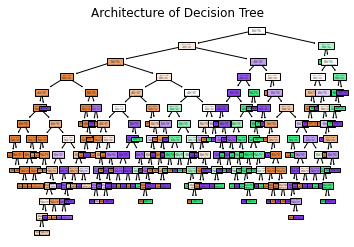

In [19]:
import matplotlib.pyplot as plt

# visualize the architecture and decision making of the Decision Tree
plt.figure()
plot_tree(final_model, filled=True)
plt.title("Architecture of Decision Tree")
plt.show()

In [22]:
import numpy as np

# create np-array with specific features related to classification as 'mosfets'
arr = np.array([
    [67.12740384615385,67.87860576923077,0.7512019230769198,92.93715324401856],
])
print(final_model.predict(arr)[0])

mosfets


c:\Users\sandr\source\repos\Monitoring_Converter_ML\venv\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [44]:
import pickle

# should try to transform the model into a binary file
s = pickle.dumps(final_model)
clf2 = pickle.loads(s)
print(clf2.predict(X[0:1]))
# print(X[0:1])

['drossel']


In [2]:
from joblib import dump, load

# store model to .joblib-format
dump(final_model, 'first_dt.joblib')

# load the model into the clf variable
clf = load('first_dt.joblib') 

In [6]:
# use of cross-validation
predictions_dt = cross_val_predict(final_model, X, Y, cv=skfdt)